### Face detection using Open-CV

Since Haar cascade is still popular method for face detection, it's implemented in open-cv. <br>
*Original paper*: https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf

Example: face detector in action in this notebook's example. 

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 

%matplotlib inline

Load the multi-face image and display. 

Text(0.5, 1.0, 'Multi-faces image')

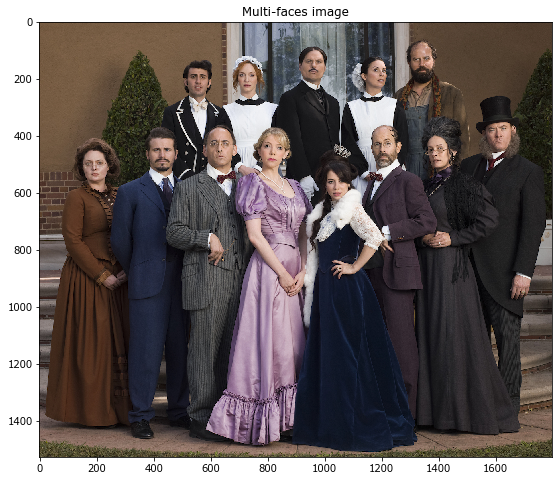

In [2]:
image = cv2.imread('example images/multi_faces.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

f = plt.figure(figsize = (18,8))

plt.imshow(image)
plt.title('Multi-faces image')

Before detecting faces on image we will convert image from RGB to grayscale. <br>
This is perfectly fine, because there is **plenty non-color specific structure in our face to learn detector on**.

Text(0.5, 1.0, 'Gray Multi-faces image')

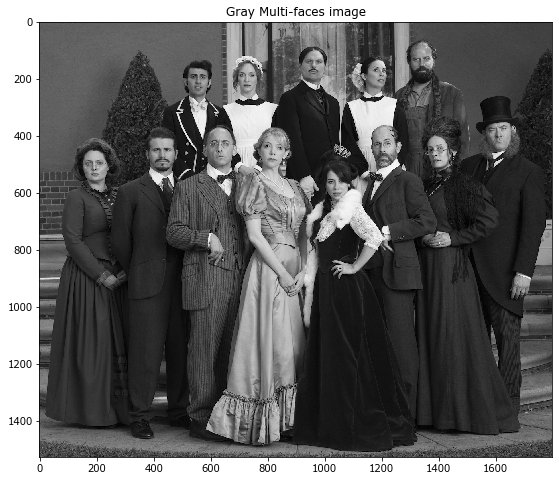

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

f = plt.figure(figsize = (18,8))

plt.imshow(gray, cmap = 'gray')
plt.title('Gray Multi-faces image')

### Pre-trained face detection model 

We can download pretrained architecture model of face detector: `haarcascade_frontalface_default.xml` and use it for image to find faces.

Model has several **parameters**: `detectMultiScale` - how many faces we want to detect (faces of varying sizes).
Respectively, this function has following params:
- `image`: input grayscale image;
- `scaleFactor`: you can detect more faces with smaller scaling factor;
- `minNeighbors`: similarly you can detect more faces with smaller value. However, if we increase last 2 params the matching can be better.

Use `cv2.CascadeClassifier` to load model.

In [4]:
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
# run detector on gray scale image 

faces = face_cascade.detectMultiScale(gray, 4,6)

In [5]:
print('We detect '+str(len(faces))+' faces in image')
print('Their coordinates and lengths/widths are as follows')
print('======================')
print(faces)

We detect 13 faces in image
Their coordinates and lengths/widths are as follows
[[ 588  390   96   96]
 [1157  390   96   96]
 [ 773  404   96   96]
 [ 383  413   96   96]
 [1344  411   96   96]
 [ 917  103   96   96]
 [1146  132   96   96]
 [1295   94   96   96]
 [ 684  150   96   96]
 [ 510  156   96   96]
 [ 147  459   96   96]
 [1565  339   96   96]
 [ 996  526   96   96]]


**Output of clssifier**: an array of detections - **coordinates that define the dimensions of bounding box around each face** (bassically **4 points** for each face). <br>
Note, this always outputs a **square bounding boxes**.

To evaluate performance of algorithm visually, let's **plot corresponding boxes on image**. 

Text(0.5, 1.0, 'Image with detected faces')

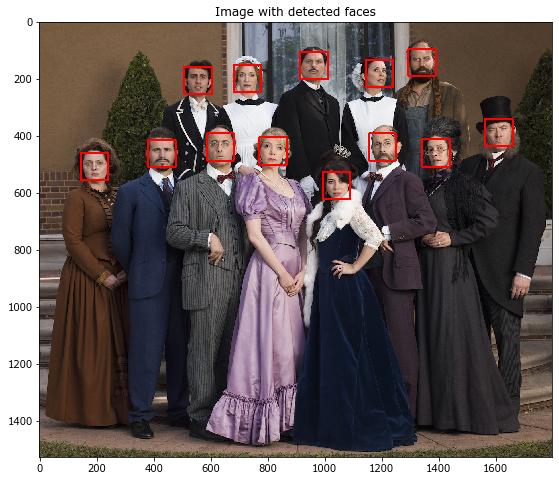

In [6]:
image_with_detections = np.copy(image)

# loop over detections and draw corresponding boxes on top of image
for (x,y,w,h) in faces:
    # parameters will be: image, starting point of rectangle, end point of rectangle (x+w, y+h), color and width 
    cv2.rectangle(image_with_detections, (x,y), (x+w, y+h), (255,0,0), 5)
f = plt.figure(figsize=(18,8))
plt.imshow(image_with_detections)
plt.title('Image with detected faces')